## 1.5 Фильтрация данных

In [ ]:
import pandas as pd
data = pd.read_csv('./StudentsPerformance.csv')
rename_map = {'math score': 'math_score', 'reading score': 'reading_score', 'writing score': 'writing_score'}
data.rename(columns = rename_map, inplace=True)

data.info()

In [ ]:
data.loc[data.gender == 'female']

### Среднее значение

In [ ]:
avg_writing_score = data['writing score'].mean()
avg_writing_score

In [ ]:
data.loc[data['writing score'] > avg_writing_score]

### Отбор по двум условиям

In [ ]:
data.loc[(data['writing score'] > 74) & (data.gender == 'female')]

### У какой доли студентов из датасэта в колонке lunch указано free/reduced?

In [ ]:
(data.lunch == 'free/reduced').mean()

### Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?

Среднее для урезанного и стандартного ланча

In [ ]:
data[(data.lunch == 'free/reduced')][['math score', 'reading score', 'writing score']].mean()

In [ ]:
data[(data.lunch == 'standard')][['math score', 'reading score', 'writing score']].var()

Дисперсия для урезанного и стандартного ланча

In [ ]:
data[(data.lunch == 'free/reduced')][['math score', 'reading score', 'writing score']].mean()

In [ ]:
data[(data.lunch == 'standard')][['math score', 'reading score', 'writing score']].var()

Другие способы решения

In [ ]:
data.groupby('lunch').describe()

In [ ]:
data.groupby('lunch').aggregate({'writing score': ['mean','var'],'reading score': ['mean','var'],'math score': ['mean','var']})

### Метод query

In [ ]:
read_scope = 90
data.query('gender == "male" & reading_score > @read_scope')

отберёт студентов, уровень образования родителей которых бакалавр или магистр

In [ ]:
data[data['parental level of education'].isin(["bachelor's degree", "master's degree"])]

наблюдения, оценка за математику которых выше 90 и за чтение меньше либо равна 72

In [ ]:
data[(data['math_score'] > 70) & (data['reading_score'] <=72)]

студенты, не прошедшие тест

In [ ]:
data[data['test preparation course'] != 'completed']

студенты со стандартным ланчем

In [39]:
data.query("lunch == 'standard'")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
987,male,group E,some high school,standard,completed,81,75,76
991,female,group B,some high school,standard,completed,65,82,78
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95


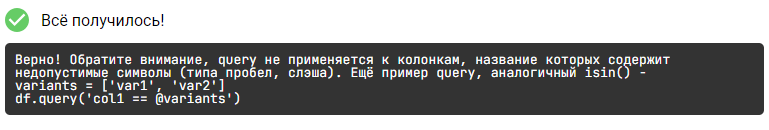